<a href="https://colab.research.google.com/github/mamun216/Editreadme/blob/master/Linear_regression_practice_on_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [ ]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.297623,0.520171,0.700905,0.092417,0.278254,0.279745,0.404975,0.046763,0.662290,0.603312,0.329258,0.036825,0.134056,-0.046708,0.306885,0.015396,0.598540,0.080679
bedrooms,0.297623,1.000000,0.516568,0.559794,0.034451,0.204544,-0.001665,0.083943,0.033362,0.351915,0.451997,0.316274,0.161967,0.022070,-0.140026,-0.000571,0.112448,0.368916,0.029790
bathrooms,0.520171,0.516568,1.000000,0.760271,0.099698,0.502922,0.075106,0.203287,-0.093770,0.658037,0.684150,0.304048,0.485344,0.066782,-0.204259,0.024225,0.225784,0.578915,0.098202
sqft_living,0.700905,0.559794,0.760271,1.000000,0.179940,0.399071,0.115926,0.296076,-0.048323,0.767252,0.867284,0.458115,0.325361,0.066638,-0.182957,0.061431,0.221843,0.753796,0.186593
sqft_lot,0.092417,0.034451,0.099698,0.179940,1.000000,0.024976,0.021209,0.067813,-0.019331,0.130381,0.197069,0.009207,0.091088,0.005113,-0.127755,-0.089428,0.228594,0.159724,0.719525
floors,0.278254,0.204544,0.502922,0.399071,0.024976,1.000000,0.034459,0.055895,-0.221416,0.461611,0.578717,-0.232526,0.418304,0.035679,-0.081430,0.034156,0.164811,0.328566,0.021043
waterfront,0.279745,-0.001665,0.075106,0.115926,0.021209,0.034459,1.000000,0.403137,0.010821,0.090393,0.083426,0.083667,-0.016000,0.084899,0.032573,-0.013097,-0.042467,0.093240,0.031511
view,0.404975,0.083943,0.203287,0.296076,0.067813,0.055895,0.403137,1.000000,0.040421,0.264660,0.180048,0.272654,-0.036637,0.098878,0.088183,0.004206,-0.083122,0.293376,0.063306
condition,0.046763,0.033362,-0.093770,-0.048323,-0.019331,-0.221416,0.010821,0.040421,1.000000,-0.124930,-0.147271,0.165994,-0.317662,-0.075130,-0.002727,-0.017456,-0.109452,-0.090664,-0.018593
grade,0.662290,0.351915,0.658037,0.767252,0.130381,0.461611,0.090393,0.264660,-0.124930,1.000000,0.762026,0.179000,0.434356,0.023467,-0.190055,0.112684,0.209345,0.737544,0.132619


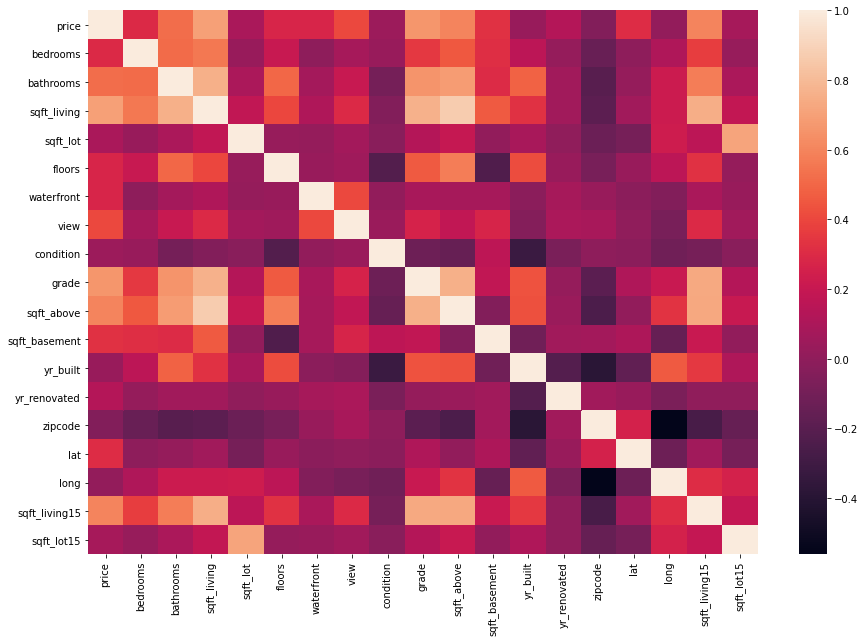

In [ ]:
import seaborn as sns
ax = plt.figure(figsize = (15, 10))
sns.heatmap(house_data.corr(), annot = None)
plt.show()

In [ ]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


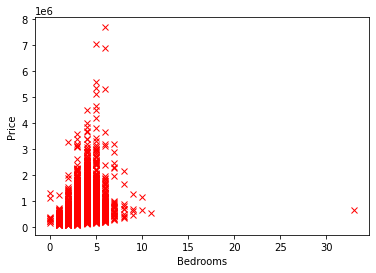

In [23]:

plt.plot(house_data.bedrooms, house_data.price, 'rx');
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


In [24]:
# Declare the independent and dependent variable 
x = house_data.drop(['price'], axis = 1)
y = house_data['price']

In [42]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 7)


In [43]:
# creating model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = model.predict(x_test)
y_pred

array([934076.79526861, 950273.93212772, 313349.02501401, ...,
       644164.62019922, 144212.47150687, 573143.1740755 ])

In [45]:
model.intercept_

11422937.04463277

In [46]:
model.coef_

array([-3.34665767e+04,  3.96204877e+04,  1.10946168e+02,  1.26678366e-01,
       -1.66713470e+03,  5.89682791e+05,  5.02088378e+04,  2.66463668e+04,
        9.12295265e+04,  7.38539976e+01,  3.70921702e+01, -2.92586229e+03,
        2.10415946e+01, -5.82815012e+02,  5.83084228e+05, -1.88983558e+05,
        3.28011572e+01, -3.92981585e-01])

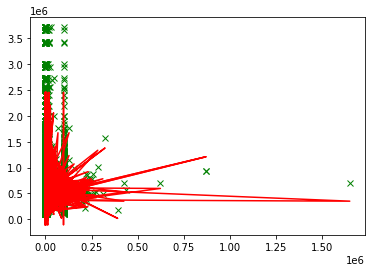

In [47]:
plt.plot(x_test, y_test, 'gx')
plt.plot(x_test, y_pred, color = 'red')
plt.show()

In [48]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

189839.21804144018


In [49]:
# new test data unseen
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')
test_new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4995,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4996,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4997,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [50]:
price = model.predict(test_new)


In [52]:
res = pd.DataFrame(price)
res.index = test_new.index
res.columns = ['price']
res.to_csv('prediction_results_HP.csv') # its from jupyter notebook

In [53]:
from google.colab import files
res.to_csv('prediction_results_HP.csv')
files.download('prediction_results_HP.csv')